# Enhanced Loan Approval Prediction Using Decision Tree Classifier

In [8]:
import pandas as pd  # Importing the pandas library for data manipulation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Importing functions for splitting and cross-validation
from sklearn.tree import DecisionTreeClassifier  # Importing the DecisionTreeClassifier for creating the model
from sklearn.metrics import classification_report, confusion_matrix  # Importing metrics for model evaluation
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for enhanced visualization


In [10]:
# Load dataset
df = pd.read_csv(r'C:\Users\Vishnu\Downloads\loan_approval_dataset.csv')  # Load the CSV file into a DataFrame

# Display the first few rows and column names
print(df.head())  # Display the first five rows of the DataFrame to understand its structure
print(df.columns)  # Print the names of the columns to check the features available

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [12]:
# Strip whitespace from headers
df.columns = df.columns.str.strip()  # Remove any leading or trailing whitespace from the column names

# Check for missing values and fill or drop them
print(df.isnull().sum())  # Print the number of missing values in each column
# Example: Filling missing values with the mean (you can choose a strategy that fits your dataset)
# df['some_column'].fillna(df['some_column'].mean(), inplace=True)  # Uncomment and modify as needed

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [14]:
# Define features and target variable
X = df.drop(columns=['loan_id', 'loan_status'])  # Features: Drop 'loan_id' and 'loan_status' columns
y = df['loan_status']  # Target variable: 'loan_status' indicates if the loan was approved or rejected

In [16]:

# Convert categorical variables to numerical
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables into dummy/indicator variables, dropping the first category to avoid dummy variable trap

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data into training (80%) and testing (20%) sets

In [18]:
# Create a Decision Tree Classifier with hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Different values for maximum depth
    'min_samples_split': [2, 5, 10]  # Different values for minimum samples required to split an internal node
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)  # Perform grid search with cross-validation
grid_search.fit(X_train, y_train)  # Fit the model to the training data
best_classifier = grid_search.best_estimator_  # Get the best classifier from the grid search

In [20]:
# Make predictions on the test set using the best classifier
y_pred = best_classifier.predict(X_test)  # Predict loan approval status on the test data

# Evaluate the model
print(confusion_matrix(y_test, y_pred))  # Print the confusion matrix to understand the model's performance
print(classification_report(y_test, y_pred))  # Print a classification report with precision, recall, and F1-score metrics

[[528   8]
 [ 12 306]]
              precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       536
    Rejected       0.97      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [22]:
# Cross-validation score
cv_scores = cross_val_score(best_classifier, X, y, cv=5)  # Perform cross-validation
print(f'Cross-validation scores: {cv_scores}')  # Print cross-validation scores
print(f'Mean cross-validation score: {cv_scores.mean()}')  # Print mean cross-validation score

Cross-validation scores: [0.97423888 0.98009368 0.98126464 0.97306792 0.97772567]
Mean cross-validation score: 0.9772781558955718


In [24]:
# Feature Importance
feature_importances = best_classifier.feature_importances_  # Get feature importances
features = X.columns  # Get feature names

In [26]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)  # Sort the DataFrame by importance

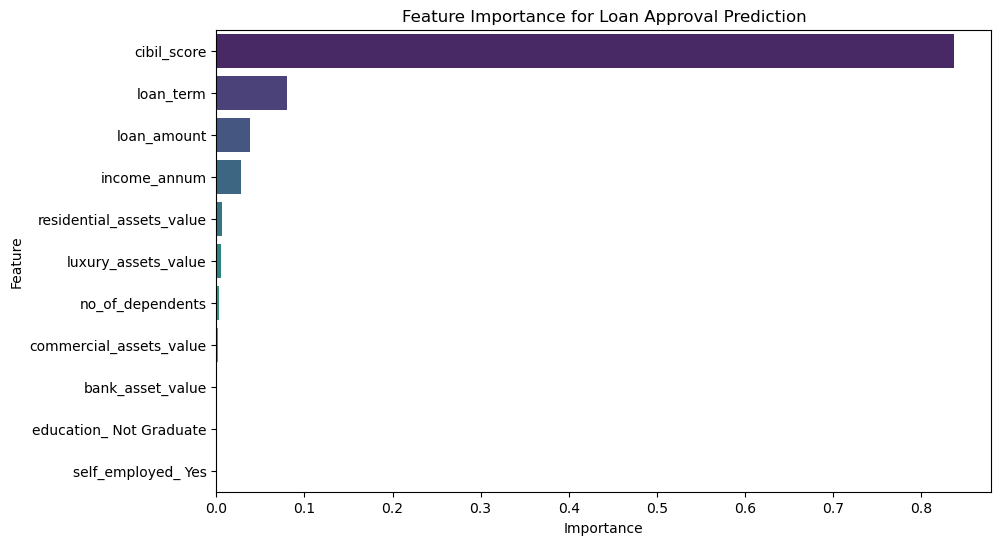

In [28]:
# Plotting feature importances
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')  # Create a horizontal bar plot
plt.title('Feature Importance for Loan Approval Prediction')  # Title for the plot
plt.xlabel('Importance')  # X-axis label
plt.ylabel('Feature')  # Y-axis label
plt.show()  # Show the plot

In [30]:
# ================== Prediction on New Data ==================

# Example: Creating a new DataFrame for prediction (modify with actual input data)
new_data = pd.DataFrame({
    'no_of_dependents': [2],  # Example value
    'education': ['Graduate'],  # Example value
    'self_employed': ['No'],  # Example value
    'income_annum': [9600000],  # Example value
    'loan_amount': [29900000],  # Example value
    'loan_term': [12],  # Example value
    'cibil_score': [778],  # Example value
    'residential_assets_value': [2400000],  # Example value
    'commercial_assets_value': [17600000],  # Example value
    'luxury_assets_value': [22700000],  # Example value
    'bank_asset_value': [8000000]  # Example value
})

# Preprocess the new data the same way as the training data
new_data.columns = new_data.columns.str.strip()  # Strip whitespace from headers
new_data_encoded = pd.get_dummies(new_data, drop_first=True)  # Convert categorical variables to numerical
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)  # Align new data with training data columns

# Make predictions on the new data
prediction = best_classifier.predict(new_data_encoded)  # Make prediction
print(f'Prediction for the new data: {prediction[0]}')  # Print the prediction result

Prediction for the new data:  Approved
